# Linear Regression

The goal of this assignment is to build a simple linear regression algorithm from scratch. Linear regression is a very useful and simple to understand predicting values, given a set of training data. The outcome of regression is a best fitting line function, which, by definition, is the line that minimizes the sum of the squared errors. When plotted on a 2 dimensional coordinate system, the errors are the distance between the actual Y' and predicted Y' of the line. In machine learning, this line equation Y' = b(x) + A is solved using gradient descent to gradually approach to it. **We will be using the statistical approach here that directly solves this line equation without using an iterative algorithm.**

## Exercise 1 - Explore the Data

The `Advertising` data set consists of the sales of that product in 200 different
markets, along with advertising budgets for the product in each of those
markets for three different media: TV, radio, and newspaper. Explore the data and decide on which variable you would like to use to predict `Sales`.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ad_df = pd.read_csv('Advertising.csv', index_col=0)
ad_df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


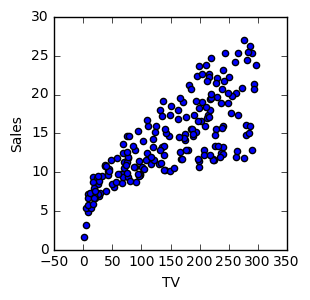

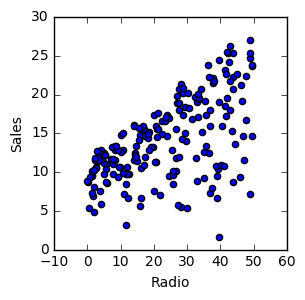

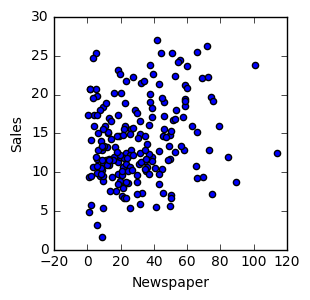

In [51]:
from pandas.tools.plotting import scatter_matrix
ad_df.plot(x='TV', y='Sales', kind='scatter', figsize=(3,3))
ad_df.plot(x='Radio', y='Sales', kind='scatter', figsize=(3,3))
ad_df.plot(x='Newspaper', y='Sales', kind='scatter', figsize=(3,3))

We will choose the TV variable to predict Sales.

## Exercise 2 - Build a Simple Linear Regression Class

The derivation can be [found here on Wikipedia](https://en.wikipedia.org/wiki/Simple_linear_regression).

The general steps are:
- Calculate mean and variance
- Calculate covariance
- Estimate coefficients
- Make predictions on out-of-sample data

The class should do the following:
- Fit a set of x,y points
- Predict the value a new x values based on the coefficients
- Can plot the best fit line on the points
- Return the coefficient and intercept
- Return the coefficient of determination (R^2)

In [61]:
class linear_reg():
    def __init__(self):
        pass
    
    def mean(self, series):
        return sum(series) / len(series)

    def variance(self, series, mean):
        return sum([(xi - mean) ** 2 for xi in series]) / len(series)
    
    def covariance(self, x, y, x_bar, y_bar):
        total = 0
        
        for i in range (len(x)):
            total += ((x[i] - x_bar) * (y[i] - y_bar))
            
        return total / len(x)
    
    def coefficients(self, x, y):
        
        self.x = x
        self.y = y
        x_bar = self.mean(x)
        y_bar = self.mean(y)
        
        b1 = self.covariance(x, y, x_bar, y_bar) / self.variance(x, x_bar)
        b0 = y_bar - (b1 * x_bar)
        
        return (b0, b1)
    
    def fit(self, x, y):
        b0, b1 = self.coefficients(x, y)
        
        self.b0 = b0
        self.b1 = b1
        
        self.y_hat = [(b0 + (b1 * xi)) for xi in self.x]
        print(self.y_hat)
        
    def predict(self, x):
        y_hat = [(self.b0 + (self.b1 * xi)) for xi in x]
        return y_hat
    
    def r_squared(self):
        # sum of squared total
        y_bar = sum(self.y) / len(self.y)
        sst = sum([(y - y_bar) ** 2 for y in self.y])
        
        # sum of squared error
        sse = sum(([(y - y_hat) ** 2 for y, y_hat in zip(self.y, self.y_hat)]))

        r2 = 1 - (sse/sst)
        
        return r2
    
    def plot(self):
        plt.scatter(self.x, self.y, c='b', label='Data', alpha = 0.5)
        plt.plot(self.x, self.y_hat, c='r', label='Regression')
        plt.legend(loc=4)
        plt.show()

## Exercise 3 - Try it out on the Advertising Data Set

In [78]:
x = list(ad_df['TV'])
y = list(ad_df['Sales'])

lr = linear_reg()
lr.fit(x, y)

[17.970774512765537, 9.1479740483970815, 7.8502237645756443, 14.234394574730189, 15.627218139417666, 7.4461623208949765, 9.7659503740263371, 12.746497729176671, 7.4414086568516744, 16.530414307645039, 10.174765481750306, 17.238710250097032, 8.1639655914335734, 11.667415991347125, 16.734821861507022, 16.321253089739752, 10.25557777048644, 20.409404166979442, 10.322129067092668, 14.034740684911505, 17.414595819699205, 18.317791987926579, 7.6600772028435653, 17.885208559986101, 9.9941262481048323, 19.529976318968579, 13.825579467006218, 18.446140917095732, 18.859709688863006, 10.388680363698896, 20.956075531959172, 12.399480254015629, 11.653154999217218, 19.658325248137736, 11.581850038567691, 20.851494923006527, 19.720122880700657, 10.583580589474277, 9.0814227517908535, 17.870947567856192, 16.658763236814192, 15.44657890577219, 20.989351180262286, 16.867924454719478, 8.2257632239965002, 15.356259288949452, 11.296630195969572, 18.436633589009126, 17.832918255509778, 10.212794794096723, 1

In [76]:
lr.coefficients(x,y)

(7.0325935491277054, 0.047536640433019688)

In [73]:
lr.r_squared()

0.61187505085007077

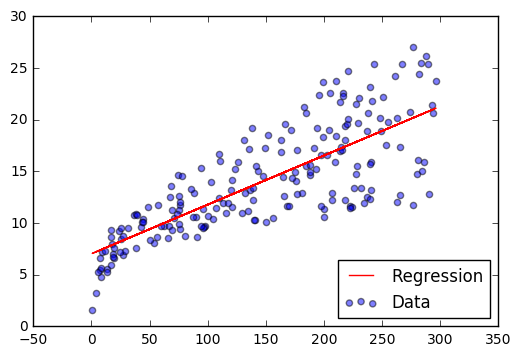

In [63]:
lr.plot()

## Exercise 4 - Check via Statsmodels or Scikit-learn

In [71]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales ~ TV', data=ad_df).fit()
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [77]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 02 Mar 2017   Prob (F-statistic):           1.47e-42
Time:                        14:18:33   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000         6.130     7.935
TV             0.0475      0.003     17.668      0.000         0.042     0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Additional Optional Exercises

- Train / test split with RMSE calculation
- Proper documentation for class methods and attributes
- Build with NumPy methods and compare computation time
- Multiple Linear Regression (SGD covered in Advanced Regression Unit)